In [84]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sns.set()
warnings.simplefilter("ignore")

In [85]:
df = pd.read_csv("StudentsPerformance.csv")

In [96]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score
0,0,1,1,1,1,52,44,50,118
1,0,2,4,1,0,49,62,64,147
2,0,1,3,1,1,70,67,69,178
3,1,0,0,0,1,27,29,20,48
4,1,2,4,1,1,56,50,51,129


In [98]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
 8   final score                  1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB
None


In [88]:
df['final score'] = df.apply(lambda x : (x['math score'] + x['reading score'] + x['writing score']) / 3, axis=1)

In [97]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final score
0,0,1,1,1,1,52,44,50,118
1,0,2,4,1,0,49,62,64,147
2,0,1,3,1,1,70,67,69,178
3,1,0,0,0,1,27,29,20,48
4,1,2,4,1,1,56,50,51,129


<AxesSubplot:>

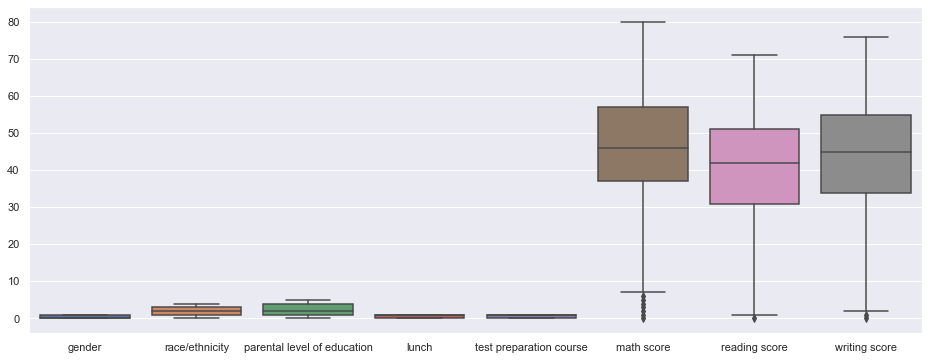

In [100]:
import matplotlib.pyplot as plb
data2 = df.drop('final score', axis=1)
plt.figure(figsize=(16, 6))
sns.boxplot(data=data2)


In [95]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [9]:
# MULTIVARIATE

In [101]:
X = df.drop('final score', axis=1)
y = df['final score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
pred = lr.predict(X_test)

In [105]:
lr.score(X_test, y_test)

0.9992194766540022

In [44]:
from sklearn.metrics import accuracy_score

accuracy = mean_squared_error(y_test, pred)
print('Mean Squared Error: ', accuracy)

Mean Squared Error:  1.692171227952071


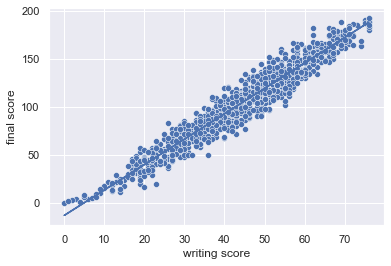

In [83]:
# UNIVARIATE
sns.scatterplot(df["writing score"],df["final score"])
plt.savefig('scp-1', dpi=500)
m, b = np.polyfit(df["writing score"], df["final score"], 1)

plt.plot(df["writing score"], m*df["writing score"] + b)

In [45]:
X_uni = df['writing score']
y_uni = df['final score']

X_uni_train, X_uni_test, y_uni_train, y_uni_test = train_test_split(X_uni,y_uni,test_size = 0.2)

In [47]:
lr2 = LinearRegression()

In [67]:
X_uni_train = X_uni_train.reshape(-1,1)
X_uni_test = X_uni_test.values.reshape(-1,1)


lr2.fit(X_uni_train, y_uni_train)

LinearRegression()

In [68]:
pred_uni = lr2.predict(X_uni_test)

In [69]:
lr2.score(X_uni_test, y_uni_test)

0.9421228773316737

In [70]:
accuracy_uni = mean_squared_error(y_uni_test, pred_uni)
print('Mean Squared Error: ', accuracy_uni)

Mean Squared Error:  109.48409107917793
